In [1]:
import pandas as pd
import numpy as np
file_path= r"C:\Users\niruw\OneDrive\Desktop\Project\Placement_Data_Full_Class.csv"
df=pd.read_csv(file_path)
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [2]:
#data exploration 
# Check basic structure
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())
print(df.head())


(215, 15)
Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  statu

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [9]:
#Data Preprocessing 
df.columns = df.columns.str.strip()
df.drop(columns=['sl_no', 'salary'], inplace=True, errors='ignore')

from sklearn.preprocessing import LabelEncoder
for column in df.select_dtypes(include='object').columns:
    df[column]=LabelEncoder().fit_transform(df[column])
    
    


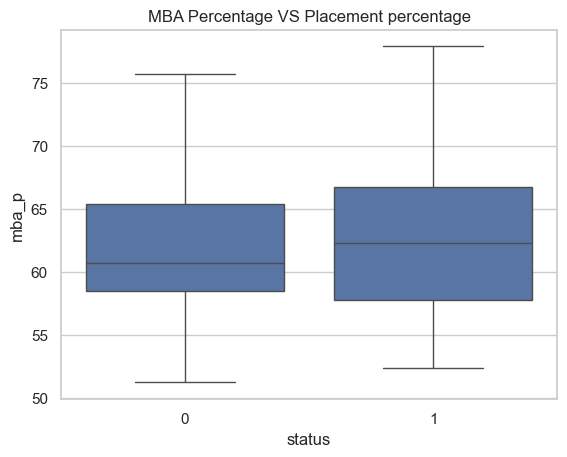

In [10]:
#Bar Plot
sns.boxplot(x='status',y='mba_p',data=df)
plt.title('MBA Percentage VS Placement percentage')
plt.show()


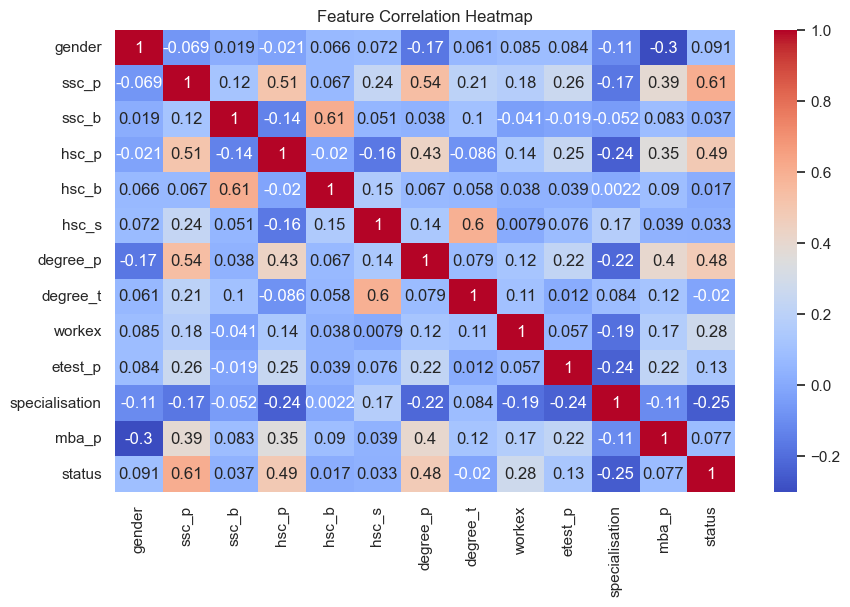

In [11]:
#Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


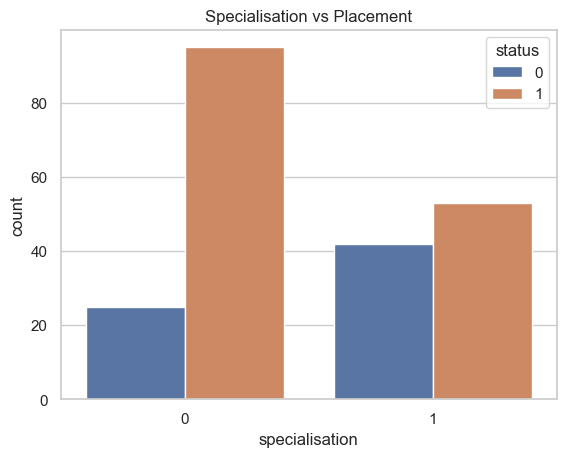

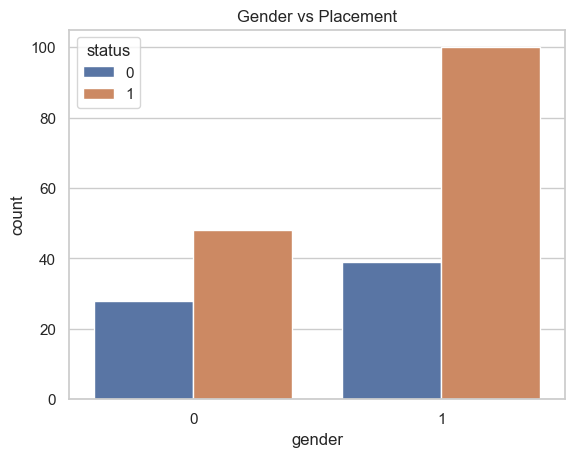

In [12]:
#Placement by specialisation
sns.countplot(x='specialisation',hue='status',data=df)
plt.title('Specialisation vs Placement')
plt.show()

sns.countplot(x='gender',hue='status',data=df)
plt.title('Gender vs Placement')
plt.show()


In [18]:
df.to_csv("cleaned_data.csv", index=False)


In [5]:
#Preprocess before modelling 
import pandas as pd
df = pd.read_csv("cleaned_data.csv")
from sklearn.model_selection import train_test_split
X = df.drop("status", axis=1)   # Features
y = df["status"]                # Target (0 = Not Placed, 1 = Placed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
#Training multiple ML models 

#Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg = LogisticRegression(max_iter=500, solver='lbfgs')
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

#Random forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))



Logistic Regression Accuracy: 0.8837209302325582
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43

Decision Tree Accuracy: 0.8372093023255814
Random Forest Accuracy: 0.7906976744186046


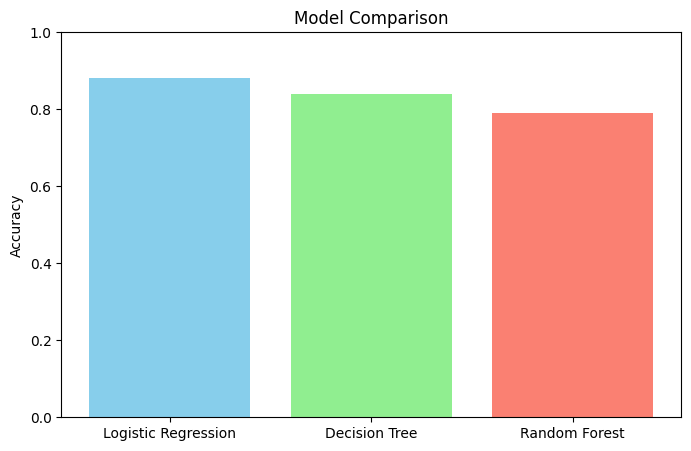

In [7]:
import matplotlib.pyplot as plt

accuracies = {
    'Logistic Regression': 0.88,
    'Decision Tree': 0.84,
    'Random Forest': 0.79
}

# Bar chart
plt.figure(figsize=(8,5))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)
plt.show()


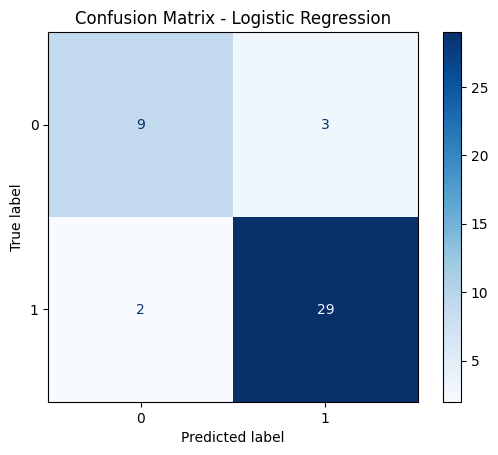

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


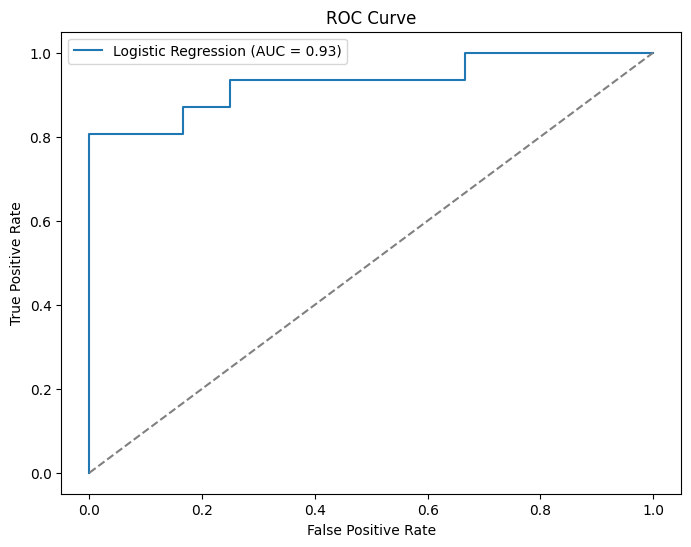

In [9]:
from sklearn.metrics import roc_curve, auc

y_prob = logreg.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
